# Splitting the train and test data 

# Method #1

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784')
X, y = mnist['data'], mnist['target']
y = y.astype("float")
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=42)

# Method #2

In [36]:
num_split = 60000

In [37]:
X_train, X_test, y_train, y_test = X[:num_split], X[num_split:], y[:num_split], y[num_split:]

Tips: Typically we shuffle the training set. This ensures the training set is randomised and data distribution is consistent. However, shuffling is bad idea for time series data.

# Shuffling the Dataset

In [38]:
import numpy as np

In [39]:
shuffle_index = np.random.permutation(num_split)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Training a binary Classifier

To simplify our problem, we will make this an exercise of "zero" or "non-zero", making it a two class problem.

We need to first convert our target to 0 or non zero.

In [40]:
y_train_0 = (y_train==0)

In [41]:
y_train_0

array([False, False, False, ..., False, False,  True])

In [42]:
y_train[-2:]

array([8., 0.])

In [43]:
y_test_0 = (y_test == 0)

In [44]:
y_test_0

array([False, False, False, ..., False, False, False])

***

# SGDClassifier

Linear classifier (SVM, logistic regression) with SGD training.

In [45]:
from sklearn.linear_model import SGDClassifier

clf = SGDClassifier(random_state = 0)
clf.fit(X_train, y_train_0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=0, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [46]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def viz(n):
    plt.imshow(X[n].reshape(28, 28))

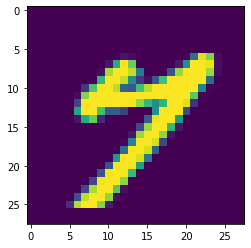

In [47]:
viz(1001)

In [48]:
clf.predict(X[1001].reshape(1, -1))

array([False])

# StratifiedKFold

Let's try with the StratifiedKFold stratified sampling to create multiple folds. At each iteration, the classifier was cloned and trained using the training folds and makes predictions on the test fold.


StratifiedKFold utilised the Stratified sampling concept

- The population is divided into homogeneous subgroups called strata.
- The right number of instances is sampled from each stratum.
- to guarantee that the test set is representative of the population.

In [49]:
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import SGDClassifier

In [50]:
from sklearn.base import clone

In [51]:
clf = SGDClassifier(random_state=0)

In [52]:
skfolds = StratifiedKFold(n_splits=3, random_state=100)

In [53]:
for train_index, test_index in skfolds.split(X_train, y_train_0):
    clone_clf = clone(clf)
    X_train_fold = X_train[train_index]
    y_train_folds = (y_train_0[train_index])
    X_train_fold = X_train[test_index]
    y_test_fold = (y_train_0[test_index])
    
    clone_clf.fit(X_train_fold, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_told)
    print("{0:.4f}".format(n_correct / len(y_pred)))

ValueError: Found input variables with inconsistent numbers of samples: [20001, 39999]